In [2]:
import numpy as np

np.random.choice(100, size=10)

X = np.ones((100, 32))

X = np.ones((100, 8, 32))
C = np.ones((8, 32))

(X - np.expand_dims(C, axis=0)).shape


(100, 8, 32)

In [3]:
import numpy as np

class KMeans:
    
    def __init__(self, k: int, max_iter: int = 300, tol: float = 1e-4):
        self.k = k
        self.max_iter = max_iter
        self.tol = tol
        
        self.cluster_centers = None
        
    def fit(self, X: np.ndarray):
        B, D = X.shape
        
        self.cluster_centers = X[np.random.choice(B, size=self.k, replace=False)]

        for _ in range(self.max_iter):
            # distance to the current centers
            distance = np.linalg.norm(X[:, None, :] - self.cluster_centers[None, :, :], axis=2)  # (B, k)
            
            # assign points to centers
            # for one point, we have k distances, and we want to find the argmin
            assignments = np.argmin(distance, axis=1)  # (B,)
            
            # re-center: we compute the mean of points assigned to that cluster
            new_centers = np.empty_like(self.cluster_centers)
            for j in range(self.k):
                mask = assignments == j
                if np.any(mask):
                    new_centers[j] = np.mean(X[mask], axis=0)
                else:
                    new_centers[j] = X[np.random.randint(0, high=B)]
            
            if np.linalg.norm(self.cluster_centers - new_centers) <= self.tol:
                break
            
            self.cluster_centers = new_centers
        
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        distance = np.linalg.norm(X[:, None, :] - self.cluster_centers[None, :, :], axis=2)  # (B, k)
        return np.argmin(distance, axis=1)

Assigned counts per cluster (0..k-1): [150 150 150]
Cluster centers (rows are clusters):
 [[-5.042  4.919]
 [-0.015 -0.049]
 [ 4.98   5.003]]


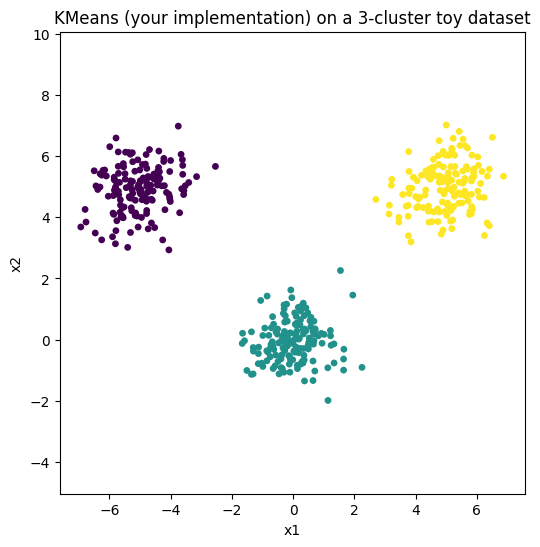

In [7]:
import numpy as np
import matplotlib.pyplot as plt


# --- Generate a simple 2D dataset with 3 clusters ---
rng = np.random.default_rng(42)
n_per = 150
centers_true = np.array([[0.0, 0.0], [5.0, 5.0], [-5.0, 5.0]])
cov = np.array([[0.6, 0.0], [0.0, 0.6]])

X = np.vstack([
    rng.multivariate_normal(centers_true[0], cov, size=n_per),
    rng.multivariate_normal(centers_true[1], cov, size=n_per),
    rng.multivariate_normal(centers_true[2], cov, size=n_per),
])

# --- Fit your KMeans and report ---
kmeans = KMeans(k=3, max_iter=300, tol=1e-4)
kmeans.fit(X)
labels = kmeans.predict(X)

# Stats
counts = np.bincount(labels, minlength=3)
print("Assigned counts per cluster (0..k-1):", counts)
print("Cluster centers (rows are clusters):\n", np.round(kmeans.cluster_centers, 3))

# --- Visualize ---
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], s=15, c=labels)
plt.scatter(kmeans.cluster_centers[:, 0], kmeans.cluster_centers[:, 1], marker='X', s=200, facecolors='none', linewidths=2)
plt.title("KMeans (your implementation) on a 3-cluster toy dataset")
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()